In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Read the data from the CSV file
df = pd.read_csv('modified7525_card_transdata.csv')
#df = pd.read_csv('card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

length_before = df.shape[0]
print(f"Length {length_before}")

df.tail()

Fraud Count 87403
Length 349611


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
349606,5.174346,0.091449,0.271987,1,1,0,1,0
349607,7.367244,0.160306,0.086809,1,1,0,1,0
349608,59.863047,0.312631,1.000054,1,0,0,1,0
349609,6.170266,0.073397,0.449757,1,0,0,1,0
349610,8.240822,3.783735,0.453087,1,0,0,1,0


In [56]:
## drop duplicates

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"The length before {length_before} length after {length_after}")

Duplicated values dropped succesfully
The length before 349611 length after 349611


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["fraud"], axis=1)
y = df["fraud"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [58]:
# len(X_val) + len(X_train) + len(X_test)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
'''
model = Sequential()
#model.add(Dense(128, activation='relu', input_dim=7))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation="relu")) #was 64
#model.add(Dense(128, activation="relu")) # DNE
#model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.summary()
'''
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

'''
model = tf.keras.Sequential(
    [
        # Adjusted number of neurons
        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(64, activation="relu",
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()
'''

'\nmodel = tf.keras.Sequential(\n    [\n        # Adjusted number of neurons\n        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(64, activation="relu",\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(1, activation="sigmoid"),\n    ]\n)\nmodel.summary()\n'

In [60]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00025), #0.0001
              loss='binary_crossentropy', 
              metrics=['accuracy'])


# configure early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# calculate class weights
neg, pos = np.bincount(y_train)
total = neg + pos
class_weight = {0: 1, 1: 5}

# train the model
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20) #epochs=100

Epoch 1/20
4917/4917 [==============================] - 8s 1ms/step - loss: 0.1019 - accuracy: 0.9609 - val_loss: 0.0318 - val_accuracy: 0.9885
Epoch 2/20
4917/4917 [==============================] - 7s 1ms/step - loss: 0.0423 - accuracy: 0.9838 - val_loss: 0.0195 - val_accuracy: 0.9930
Epoch 3/20
4917/4917 [==============================] - 7s 1ms/step - loss: 0.0318 - accuracy: 0.9879 - val_loss: 0.0159 - val_accuracy: 0.9939
Epoch 4/20
4917/4917 [==============================] - 8s 2ms/step - loss: 0.0258 - accuracy: 0.9901 - val_loss: 0.0129 - val_accuracy: 0.9953
Epoch 5/20
4917/4917 [==============================] - 8s 2ms/step - loss: 0.0222 - accuracy: 0.9915 - val_loss: 0.0120 - val_accuracy: 0.9953
Epoch 6/20
4917/4917 [==============================] - 8s 2ms/step - loss: 0.0207 - accuracy: 0.9920 - val_loss: 0.0103 - val_accuracy: 0.9961
Epoch 7/20
4917/4917 [==============================] - 8s 2ms/step - loss: 0.0189 - accuracy: 0.9926 - val_loss: 0.0112 - val_accuracy:

In [61]:
# results

[]

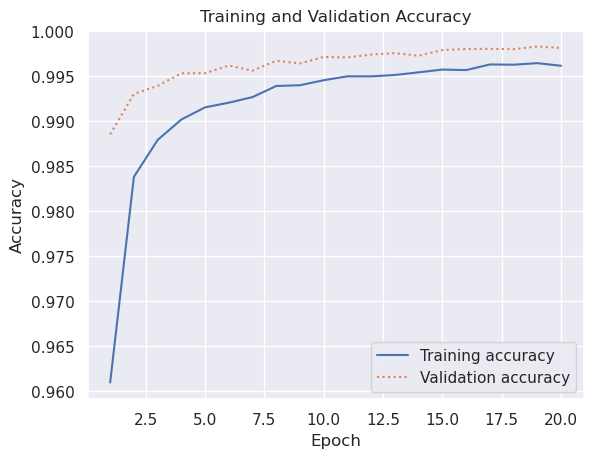

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

loss_values = history.history["loss"]
val_loss_values = history.history["val_loss"]
acc = history.history["accuracy"]
val = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

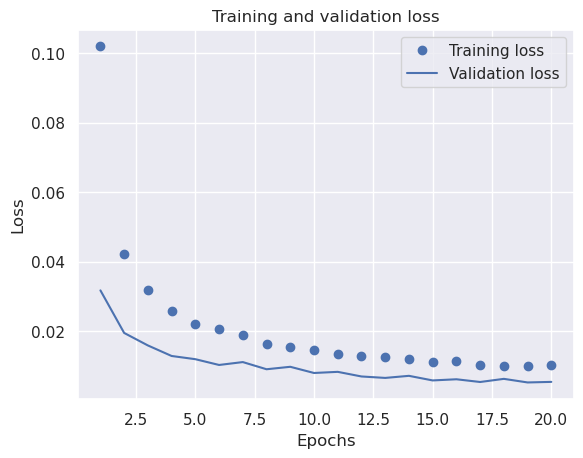

In [63]:
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

4371/4371 [==============================] - 4s 801us/step


Text(109.44999999999997, 0.5, 'Actual label')

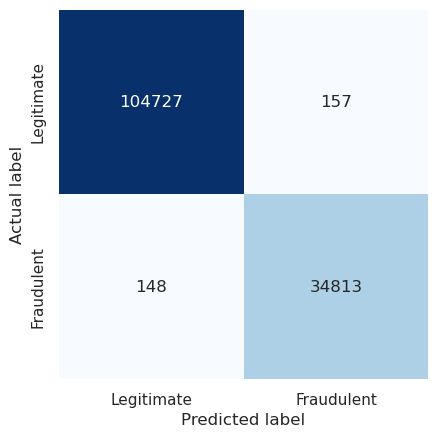

In [64]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [65]:
true_legitimate = 0
true_fraudulent = 0
false_legitimate = 0
false_fraudulent = 0

for i in range(0, len(y_predicted)):
    if y_predicted[i] and y_test.iloc[i]:
        true_fraudulent+=1
    elif y_predicted[i] and (not y_test.iloc[i]):
        false_fraudulent+=1
    elif (not y_predicted[i]) and y_test.iloc[i]:
        false_legitimate+=1
    elif (not y_predicted[i]) and (not y_test.iloc[i]):
        true_legitimate+=1
        

true_legitimate

104727

In [66]:
print('true legitimate: ' + str(true_legitimate))
print('true fraudulent: ' + str(true_fraudulent))
print('false legitimate: ' + str(false_legitimate))
print('false fraudulent: ' + str(false_fraudulent))

true legitimate: 104727
true fraudulent: 34813
false legitimate: 148
false fraudulent: 157


In [67]:
test_acc = (true_legitimate + true_fraudulent)/len(y_test)
print(test_acc)

0.9978190139082556


In [68]:
# Read the data from the CSV file
df = pd.read_csv('card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

length_before = df.shape[0]
print(f"Length {length_before}")

df.tail()

Fraud Count 87403
Length 1000000


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


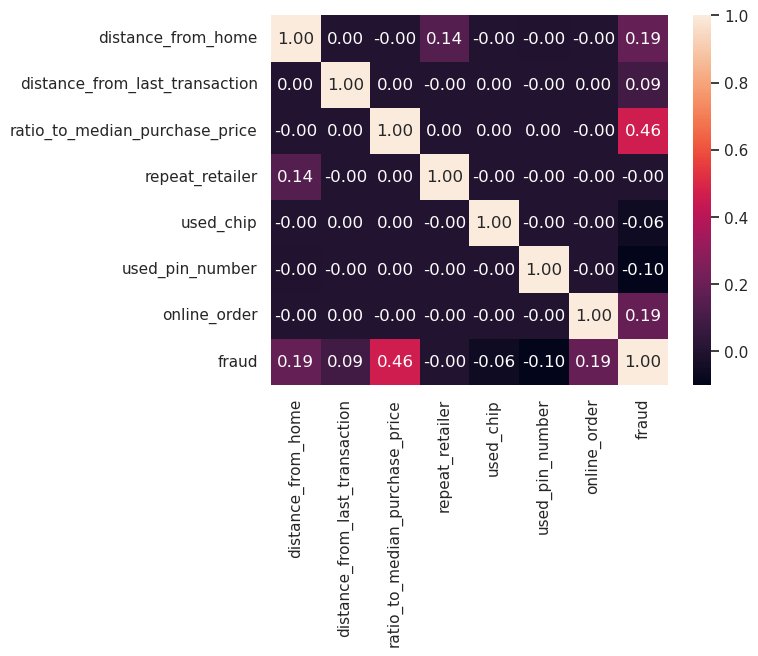

In [76]:
# create correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, fmt='.2f')
plt.show()

In [69]:
## drop duplicates

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"The length before {length_before} length after {length_after}")

Duplicated values dropped succesfully
The length before 1000000 length after 1000000


In [70]:
X = df.drop(["fraud"], axis=1)
Y = df["fraud"]

X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [71]:
#normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

31250/31250 [==============================] - 24s 767us/step


Text(109.44999999999997, 0.5, 'Actual label')

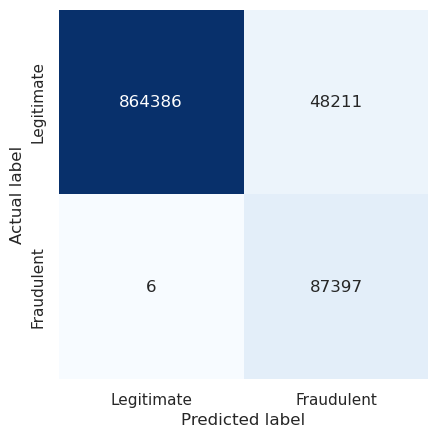

In [72]:
y_predicted = model.predict(X) > 0.5
mat = confusion_matrix(Y, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [73]:
true_legitimate = 0
true_fraudulent = 0
false_legitimate = 0
false_fraudulent = 0

for i in range(0, len(y_predicted)):
    if y_predicted[i] and Y.iloc[i]:
        true_fraudulent+=1
    elif y_predicted[i] and (not Y.iloc[i]):
        false_fraudulent+=1
    elif (not y_predicted[i]) and Y.iloc[i]:
        false_legitimate+=1
    elif (not y_predicted[i]) and (not Y.iloc[i]):
        true_legitimate+=1
        

true_legitimate

864386

In [74]:
print('true legitimate: ' + str(true_legitimate))
print('true fraudulent: ' + str(true_fraudulent))
print('false legitimate: ' + str(false_legitimate))
print('false fraudulent: ' + str(false_fraudulent))

true legitimate: 864386
true fraudulent: 87397
false legitimate: 6
false fraudulent: 48211


In [75]:
test_acc = (true_legitimate + true_fraudulent)/len(Y)
print(test_acc)

0.951783
